<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/TP2_INICIAL_MAJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y Tecnología - TP N° 2**

# Análisis de redes y grafos

In [ ]:
!pip install networkx powerlaw community

In [ ]:
# Para visuzalización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx
import community
import powerlaw

from sklearn.metrics import adjusted_rand_score
import glob

In [ ]:
# Descomprimo el ZIP
!unzip DataSujetos.zip

In [ ]:
# genero 4 vectores con los nombres de los archivos por estadio
N1_csv = glob.glob('DataSujetos/N1_*.csv')
N2_csv = glob.glob('DataSujetos/N2_*.csv')
N3_csv = glob.glob('DataSujetos/N3_*.csv')
W_csv = glob.glob('DataSujetos/W_*.csv')

In [ ]:
def calcula_umbral_posicion(matriz, num):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)

  umbral= vec_matriz[num]

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2
  
def calcula_umbral_porcentaje(matriz, porc):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)


  umbral= (max(vec_matriz) - min(vec_matriz))* porc + min(vec_matriz)

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2

## Datos de entrada
Contamos con informacion de 18 personas.
Tenemos 1 matriz pesada por persona para 3 estadíos de sueño (N1, N2 y N3) y 1 para despierto (W)

In [ ]:
# levantamos la primera matriz para el sujeto 1 para ver su forma
ws = pd.read_csv('/content/DataSujetos/N1_suj1.csv',sep=',',header=None)
# la matriz es de 116X116 correspondientes a las 116 regiones del cerebro descriptas en el archivo(aal_extended.csv)
# se trata de una matriz pesada

ws.shape

(116, 116)

In [ ]:
ws

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.00000,0.85820,0.74820,0.69050,0.560560,0.50986,0.78675,0.67046,0.62666,0.516140,0.69279,0.546280,0.730700,0.57401,0.607920,0.552790,0.593970,0.57640,0.61552,0.59837,0.50325,0.324410,0.57906,0.63112,0.300740,0.563980,0.339100,0.474590,0.562490,0.40937,0.392450,0.39032,0.70674,0.62915,0.52838,0.39262,0.46196,0.50963,0.330450,0.49063,...,0.175990,0.200980,0.670990,0.620260,0.671880,0.601940,0.521290,0.53425,0.60483,0.54071,0.396090,0.408050,0.54435,0.63290,0.376010,0.395490,0.26689,0.419170,0.543150,0.389260,0.532430,0.539570,0.47999,0.473650,0.269460,0.360650,0.234100,0.302360,0.270490,0.314590,0.070193,0.357900,0.215420,0.440370,0.398300,0.263700,0.280490,0.37435,0.19217,-0.403830
1,0.85820,1.00000,0.66561,0.70798,0.595630,0.58173,0.69447,0.71025,0.51457,0.508490,0.65615,0.652330,0.637840,0.62525,0.530240,0.593760,0.688370,0.74709,0.59367,0.72786,0.59439,0.436330,0.52238,0.60785,0.157100,0.527040,0.296240,0.422700,0.645750,0.58155,0.507930,0.54062,0.78734,0.76453,0.50854,0.39730,0.42878,0.53491,0.410420,0.56428,...,0.102010,0.204710,0.734280,0.752980,0.746690,0.678940,0.542430,0.54577,0.53586,0.51554,0.372590,0.353680,0.46457,0.62418,0.351920,0.222870,0.23336,0.258800,0.543140,0.428000,0.586110,0.575810,0.54693,0.472010,0.222060,0.247070,0.209520,0.274930,0.229170,0.311910,-0.029244,0.346450,0.218220,0.410180,0.397400,0.240950,0.232530,0.44131,0.21853,-0.468190
2,0.74820,0.66561,1.00000,0.78922,0.681110,0.52815,0.86555,0.71271,0.60522,0.556090,0.57916,0.511000,0.766050,0.56140,0.680730,0.560650,0.479700,0.43983,0.49533,0.42022,0.54400,0.423500,0.89028,0.85698,0.556820,0.776610,0.546560,0.660940,0.444000,0.31142,0.555380,0.53149,0.66839,0.58631,0.64685,0.43681,0.48499,0.51075,0.320030,0.51107,...,0.152350,0.125310,0.595790,0.535200,0.597270,0.606570,0.559650,0.58022,0.73231,0.64493,0.428320,0.492250,0.57674,0.62041,0.349330,0.439960,0.29891,0.515190,0.454120,0.351920,0.466230,0.476680,0.46399,0.426880,0.227530,0.420390,0.209850,0.254360,0.246720,0.291010,0.107320,0.267670,0.161780,0.251980,0.280950,0.254870,0.271330,0.29699,0.18883,-0.295620
3,0.69050,0.70798,0.78922,1.00000,0.615370,0.73037,0.81926,0.93598,0.51765,0.614330,0.64571,0.734500,0.654330,0.77029,0.509460,0.632450,0.532240,0.60394,0.57594,0.62459,0.58489,0.442870,0.69707,0.81942,0.286090,0.653860,0.291400,0.491570,0.594990,0.60106,0.619300,0.68468,0.73039,0.75219,0.61779,0.53300,0.38556,0.51807,0.369940,0.49913,...,0.183850,0.324820,0.572820,0.577620,0.572450,0.654140,0.496870,0.52446,0.62584,0.62660,0.313390,0.338200,0.58322,0.68827,0.541150,0.466600,0.49095,0.433860,0.478690,0.400420,0.542180,0.527420,0.57162,0.536960,0.473390,0.421580,0.402300,0.379000,0.342790,0.399390,0.025815,0.330020,0.234740,0.291840,0.374290,0.348280,0.374250,0.47504,0.29950,-0.348150
4,0.56056,0.59563,0.68111,0.61537,1.000000,0.72148,0.69519,0.62785,0.51788,0.702010,0.49541,0.589710,0.647690,0.56793,0.571780,0.666850,0.381960,0.37473,0.19726,0.31112,0.41233,0.362480,0.55192,0.62195,0.223530,0.713050,0.782430,0.796380,0.451140,0.37355,0.495480,0.42545,0.53218,0.46507,0.42148,0.34496,0.37053,0.52208,0.171870,0.49004,...,-0.092139,-0.021398,0.466000,0.416930,0.478790,0.569020,0.594820,0.60639,0.53255,0.59451,0.448230,0.403070,0.34553,0.55291,0.187410,0.204400,0.17537,0.311450,0.363200,0.387720,0.269100,0.341370,0.27973,0.265660,0.036038,0.220090,0.032030,0.120600,-0.030734,0.162980,-0.137990,0.111520,0.044589,0.221560,0.061511,0.063156,0.094970,0.28266,0.14465,-0.452660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

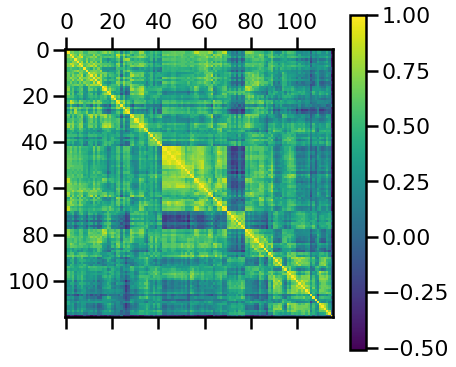

In [ ]:
plt.matshow(ws)
plt.colorbar()


In [ ]:
 #lo transformo a array de nump para luego transformarlo en matriz de NX
ws_a = np.array(ws)
G_obs = nx.from_numpy_matrix(ws_a)# usar opción parallel_edges=False si se usa una matriz de ints

In [ ]:
ws_a

array([[ 1.     ,  0.8582 ,  0.7482 , ...,  0.37435,  0.19217, -0.40383],
       [ 0.8582 ,  1.     ,  0.66561, ...,  0.44131,  0.21853, -0.46819],
       [ 0.7482 ,  0.66561,  1.     , ...,  0.29699,  0.18883, -0.29562],
       ...,
       [ 0.37435,  0.44131,  0.29699, ...,  1.     ,  0.7395 , -0.1367 ],
       [ 0.19217,  0.21853,  0.18883, ...,  0.7395 ,  1.     , -0.01452],
       [-0.40383, -0.46819, -0.29562, ..., -0.1367 , -0.01452,  1.     ]])

In [ ]:
# vemos el contenido de uno de los vectores
N1_csv[1:10]

['DataSujetos/N1_suj12.csv',
 'DataSujetos/N1_suj15.csv',
 'DataSujetos/N1_suj14.csv',
 'DataSujetos/N1_suj9.csv',
 'DataSujetos/N1_suj4.csv',
 'DataSujetos/N1_suj18.csv',
 'DataSujetos/N1_suj3.csv',
 'DataSujetos/N1_suj2.csv',
 'DataSujetos/N1_suj1.csv']

In [ ]:
# voy a generar una matriz con los promedios
# para el primero de los vectores
N1_prom=np.zeros((116, 116))
for arch in N1_csv:
    # levanto los datos, los trasnformo a array 
    mat=pd.read_csv(arch,sep=',',header=None)
    mat=np.array(mat)
    # los voy sumando todos a mi matriz N1_prom
    N1_prom=N1_prom+mat
   
# divido por el total para generar el promedio
N1_prom =N1_prom/len(N1_csv)
pd.DataFrame(N1_prom)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.904321,0.735057,0.723526,0.583049,0.561781,0.758981,0.735127,0.616454,0.575069,0.798199,0.741889,0.796870,0.729703,0.725438,0.688164,0.799044,0.764322,0.849991,0.815863,0.462332,0.365780,0.641368,0.620678,0.554219,0.546984,0.595826,0.614568,0.704503,0.662316,0.514237,0.471428,0.749762,0.684322,0.588193,0.505072,0.584542,0.533939,0.584192,0.617726,...,0.284393,0.243344,0.745783,0.725301,0.830978,0.824026,0.711716,0.730188,0.766596,0.751021,0.629226,0.643766,0.743592,0.753803,0.418929,0.488288,0.269370,0.433745,0.493879,0.430857,0.644284,0.599597,0.567273,0.607399,0.410305,0.502729,0.433733,0.472363,0.390682,0.447964,0.326236,0.275041,0.333900,0.535109,0.488681,0.483971,0.401715,0.479057,0.349738,0.158671
1,0.904321,1.000000,0.696327,0.736999,0.571637,0.549751,0.709039,0.733717,0.578979,0.558938,0.723089,0.752709,0.717012,0.713167,0.664749,0.673847,0.811242,0.825954,0.827089,0.853472,0.459610,0.367985,0.617328,0.612208,0.528532,0.545016,0.578540,0.593918,0.703590,0.701004,0.539663,0.507807,0.775787,0.733652,0.585885,0.522805,0.587843,0.565382,0.594246,0.638775,...,0.329038,0.312032,0.762412,0.766811,0.825954,0.838771,0.674980,0.725057,0.713167,0.725436,0.585156,0.609877,0.693244,0.723254,0.437581,0.471662,0.287685,0.422231,0.490846,0.456862,0.672863,0.609024,0.593846,0.604942,0.434351,0.484626,0.462586,0.468298,0.392686,0.438036,0.346351,0.282312,0.340845,0.536268,0.526147,0.510107,0.423120,0.511886,0.356228,0.151768
2,0.735057,0.696327,1.000000,0.863467,0.787321,0.720569,0.903822,0.763985,0.809697,0.698096,0.626762,0.609227,0.716488,0.650970,0.719406,0.664832,0.590357,0.594939,0.737369,0.666944,0.517589,0.419107,0.904726,0.849873,0.758462,0.737178,0.729962,0.701077,0.540223,0.533262,0.610132,0.599482,0.692215,0.624655,0.628975,0.530712,0.537168,0.500675,0.558182,0.586266,...,0.295499,0.263574,0.571846,0.571488,0.643250,0.666548,0.595309,0.629561,0.726386,0.708465,0.577475,0.619362,0.710089,0.739602,0.543347,0.585519,0.485778,0.621566,0.385777,0.298580,0.538484,0.479816,0.517110,0.556484,0.444853,0.558681,0.429604,0.458138,0.397008,0.442425,0.321995,0.243823,0.243093,0.397221,0.440448,0.444766,0.441407,0.422304,0.322304,0.050469
3,0.723526,0.736999,0.863467,1.000000,0.723804,0.743645,0.842917,0.892964,0.744762,0.743132,0.625271,0.696274,0.687060,0.733075,0.668633,0.715651,0.614962,0.629722,0.734532,0.717461,0.515362,0.458428,0.831008,0.872948,0.685676,0.742821,0.675180,0.694593,0.579985,0.599917,0.659532,0.686303,0.727107,0.707533,0.634327,0.583401,0.534052,0.531735,0.548344,0.589084,...,0.333826,0.338650,0.590976,0.597723,0.650580,0.679424,0.577462,0.638287,0.694320,0.714596,0.527138,0.568614,0.681863,0.727273,0.588289,0.545304,0.533672,0.551064,0.396819,0.326679,0.542108,0.471251,0.540630,0.538046,0.523107,0.527224,0.477276,0.442825,0.428241,0.431057,0.355737,0.263165,0.274479,0.423171,0.464159,0.447382,0.425683,0.423810,0.339419,0.090560
4,0.583049,0.571637,0.787321,0.723804,1.000000,0.792615,0.743912,0.648637,0.819362,0.711658,0.476791,0.480378,0.567964,0.527561,0.648246,0.587152,0.476584,0.485861,0.577368,0.553583,0.515914,0.425365,0.729651,0.703407,0.666939,0.610453,0.723078,0.660629,0.424320,0.436544,0.479758,0.472224,0.580057,0.531737,0.532924,0.465096,0.431838,0.421634,0.471289,0.483160,...,0.225997,0.200061,0.468703,0.462036,0.529566,0.544688,0.508353,0.547812,0.587046,0.583724,0.519539,0.534733,0.627295,0.644307,0.500955,0.522314,0.457026,0.548534,0.306271,0.214374,0.433992,0.354488,0.440587,0.469278,0.398539,0.511852,0.382927,0.418770,0.322322,0.367448,0.292212,0.214037,0.199547,0.316876,0.391484,0.391257,0.411443,0.377174,0.280599,0.022240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# calcula  el umbral  por el porcentaje del parametro

mat1=calcula_umbral_porcentaje (N1_prom, 0.5)
mat1


array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

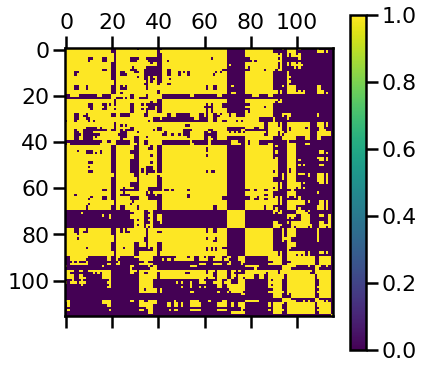

In [ ]:
plt.matshow(mat1)
plt.colorbar()

In [ ]:
mat2=calcula_umbral_porcentaje (N1_prom, 0.75)
pd.DataFrame(mat2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


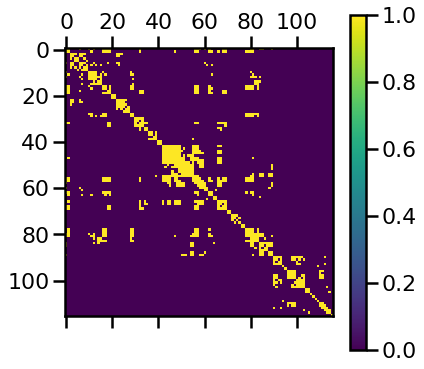

In [ ]:
plt.matshow(mat2)
plt.colorbar()

**desde aca para abajo, es lo que ya estaba en la notebook**

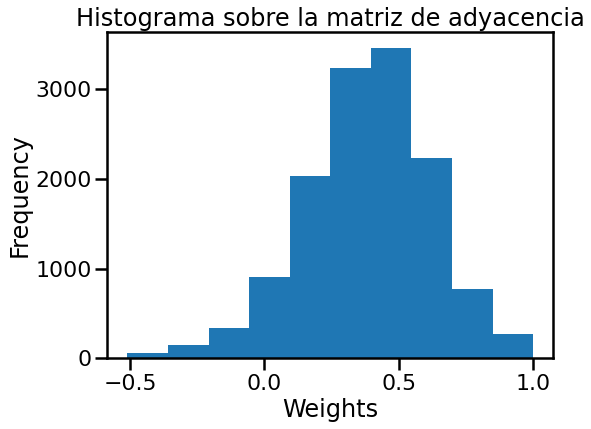

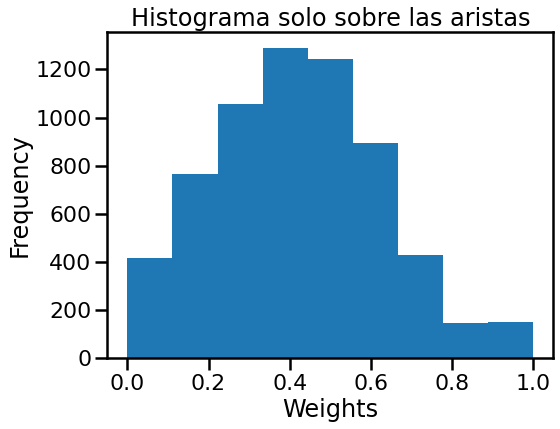

In [ ]:
plt.figure()
plt.hist(ws_a.flatten())
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title('Histograma sobre la matriz de adyacencia')

plt.figure()
nodo_salida = [n1 for n1, n2, att in G_obs.edges(data=True)]
nodo_entrada = [n2 for n1, n2, att in G_obs.edges(data=True)]
weights = [att['weight'] for n1, n2, att  in G_obs.edges(data=True)]
plt.hist(weights,bins=np.linspace(0,1,10));
plt.ylabel('Frequency')
plt.xlabel('Weights');
plt.title('Histograma solo sobre las aristas');

## Caracterización y análisis de la red
### Características generales, número de nodos (V) y aristas (E)

In [ ]:
print(nx.info(G_obs))
print('Is weigthed:',nx.is_weighted(G_obs))

G_obs.number_of_nodes(), G_obs.number_of_edges()

Name: 
Type: Graph
Number of nodes: 43
Number of edges: 336
Average degree:  15.6279
Is weigthed: True


(43, 336)

In [ ]:
print(nx.info(G_per))
print('Is weigthed:',nx.is_weighted(G_per))

G_per.number_of_nodes(), G_per.number_of_edges()

Name: 
Type: Graph
Number of nodes: 43
Number of edges: 478
Average degree:  22.2326
Is weigthed: True


(43, 478)

In [ ]:
# Para ver una lista de aristas o nodos
e = G_obs.edges
pd.DataFrame.from_dict(e).rename(columns={0:'from',1:'to'}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
from,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,...,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,29,29,29,29,30,30,31,31,32,32,32,33,33,33,33,34,34,34,35,35,37,37,37,41
to,4,5,7,14,15,17,20,24,25,28,29,35,37,40,41,2,4,5,6,7,16,38,4,5,6,7,13,14,16,19,20,29,31,35,36,37,5,6,10,13,...,28,32,33,34,35,41,29,32,33,34,35,36,37,38,39,41,30,35,37,41,37,40,36,37,33,34,39,34,35,39,41,35,39,41,41,42,39,40,42,42


## ¿Las redes tienen loops o aristas múltiples? ¿Son redes completamente conectadas?

In [ ]:
# Están conectados?
nx.is_connected(G_obs), nx.is_connected(G_per)

(True, True)

In [ ]:
# Tienen multiples aristas
G_obs.is_multigraph(), G_per.is_multigraph()

(False, False)

## Otras características topológicas de la red
¿Cuál es el diámetro de la red? ¿Cuáles son los vertices que determinan ese diámetro? La función para calcular el diámetro tienen en cuenta los pesos de las aristas.

In [ ]:
nx.diameter(G_obs), nx.diameter(G_per)

(3, 3)

La densidad de un grafo es el cociente entre el número de aristas de un grafo y el número de todos las posibles aristas. Como nuestras dos redes tienen el mismo número de nodos, estamos determinando algo que ya habíamos visto antes, la red de relaciones percibidas tiene más conexiones que la red de relaciones observadas.

In [ ]:
nx.density(G_obs), nx.density(G_per)

(0.37209302325581395, 0.5293466223698782)

La densidad de la segunda red es alta comparada con lo común para redes sociales.

El coeficiente de clustering global que vimos en clase se calcula en average_clustering.

In [ ]:
nx.average_clustering(G_obs), nx.average_clustering(G_per)

(0.6534338903754252, 0.8652893662056299)

In [ ]:
nx.transitivity(G_obs), nx.transitivity(G_per)

(0.5638826959355171, 0.819492883400886)

La red de interacciones percibidas tiene un coeficiente de clustering mayor que la observada. indicando que los individuos asumen una intensidad de interacciones mayor que la registrada durante los 31 días de observaciones. En particular lo que podemos ver es que en la red de interacciones percibidas hay bastantes individuos para quienes el grupo supone que tienen contactos que a su vez están muy conectados entre sí.

## Histograma de coeficiente de clustering

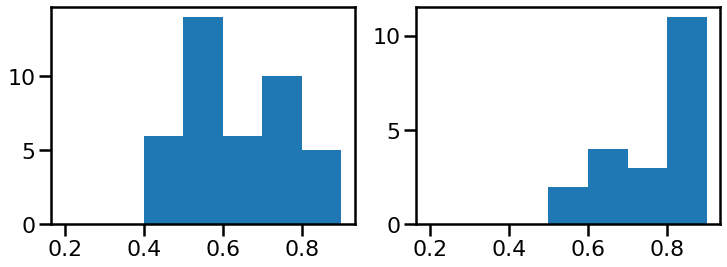

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_obs).values(),bins=np.arange(0.2,1,0.1));
plt.subplot(122)
plt.hist(nx.clustering(G_per).values(),bins=np.arange(0.2,1,0.1));

## Grados totales, de entrada y de salida


In [ ]:
G_obs.degree, G_per.degree

(DegreeView({0: 15, 1: 7, 2: 15, 3: 7, 4: 26, 5: 31, 6: 28, 7: 17, 8: 10, 9: 7, 10: 7, 11: 19, 12: 19, 13: 17, 14: 25, 15: 11, 16: 18, 17: 26, 18: 11, 19: 6, 20: 21, 21: 12, 22: 17, 23: 19, 24: 23, 25: 25, 26: 12, 27: 13, 28: 24, 29: 17, 30: 12, 31: 8, 32: 10, 33: 19, 34: 20, 35: 13, 36: 7, 37: 20, 38: 9, 39: 8, 40: 12, 41: 15, 42: 14}),
 DegreeView({0: 18, 1: 20, 2: 23, 3: 20, 4: 21, 5: 22, 6: 22, 7: 28, 8: 21, 9: 23, 10: 21, 11: 23, 12: 21, 13: 22, 14: 22, 15: 20, 16: 21, 17: 23, 18: 24, 19: 26, 20: 18, 21: 21, 22: 21, 23: 21, 24: 22, 25: 18, 26: 38, 27: 22, 28: 24, 29: 29, 30: 22, 31: 10, 32: 18, 33: 21, 34: 18, 35: 27, 36: 19, 37: 24, 38: 20, 39: 37, 40: 22, 41: 26, 42: 17}))

Grados por nodo

In [ ]:
df = pd.DataFrame(G_per.degree,columns=['Node','Degree']).set_index('Node')
df.T

Node,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
Degree,18,20,23,20,21,22,22,28,21,23,21,23,21,22,22,20,21,23,24,26,18,21,21,21,22,18,38,22,24,29,22,10,18,21,18,27,19,24,20,37,22,26,17


Ordenados

In [ ]:
df.sort_values('Degree',ascending=False).T

Node,26,39,29,7,35,19,41,37,28,18,2,17,9,11,40,13,14,30,5,27,6,24,10,33,4,23,22,8,16,12,21,1,3,38,15,36,0,34,32,25,20,42,31
Degree,38,37,29,28,27,26,26,24,24,24,23,23,23,23,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,20,20,20,20,19,18,18,18,18,18,17,10


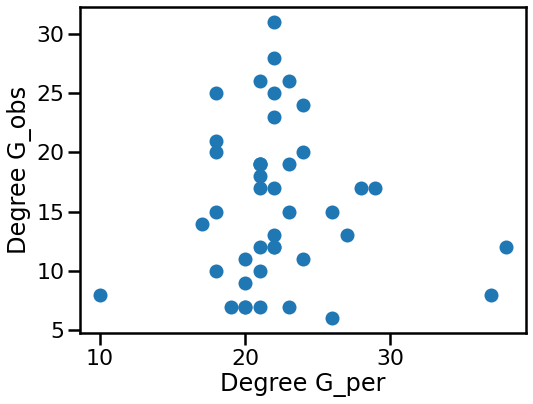

In [ ]:
degree_per = [d for n, d in G_per.degree]
degree_obs = [d for n, d in G_obs.degree]

plt.scatter(degree_per,degree_obs);
plt.axis('equal')
plt.xlabel('Degree G_per')
plt.ylabel('Degree G_obs');

In [ ]:
np.corrcoef(degree_per,degree_obs)

array([[ 1.        , -0.04875002],
       [-0.04875002,  1.        ]])

No se observa una relación entre el grado que predice el grupo para cada individuo, y el grado que se observado.

Vamos a analizar con más detalle las distribuciones de grado, calculando las distribuciones de los grados y las distribuciones acumuladas. A partir de éstas, podemos realizar los correspondientes gráficos.

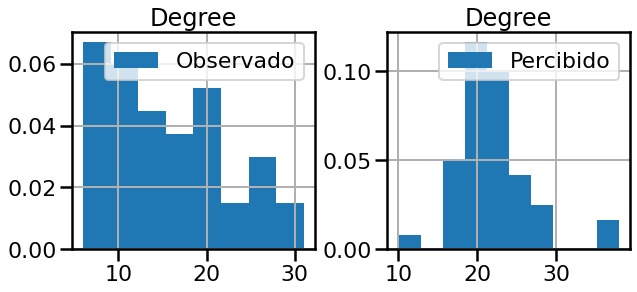

In [ ]:
df_per_degree = pd.DataFrame(G_per.degree,columns=['Node','Degree']).set_index('Node')
df_obs_degree = pd.DataFrame(G_obs.degree,columns=['Node','Degree']).set_index('Node')

plt.figure(figsize=(10,4))
df_obs_degree.hist(bins=8,density=True,ax=plt.subplot(121),label='Observado');
plt.legend()
df_per_degree.hist(density=True,ax=plt.subplot(122),label='Percibido');
plt.legend();

En ambas redes vemos que hay un número bajo de nodos de alto grado y varios de grado menor. Los siguientes gráficos muestran como se observa este fenómeno en los gráficos de distribuciones acumuladas. También podemos ver que la variación en ambas curvas no es la misma.

<Figure size 576x288 with 0 Axes>

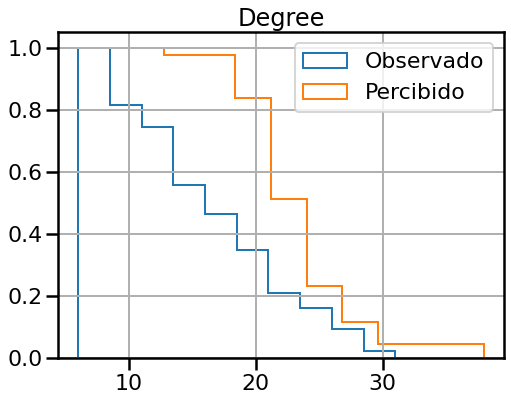

In [ ]:
plt.figure(figsize=(8,4));
df_obs_degree.hist(density=True, histtype='step',label='Observado', cumulative=-1);
df_per_degree.hist(density=True,ax=plt.gca(), histtype='step',label='Percibido', cumulative=-1);
plt.legend();

## Mundos pequeños o libre de escala
Estas redes son relativamente chicas como para intentar probar si son de mundo pequeño o libre de escala, pero podemos probar.

Medida para establecer si es mundo pequeño. El coeficiente de mundo pequeño (omega) varía entre -1 y 1. Los valores cercanos a 0 significan que G tiene características de mundo pequeño. Los valores cercanos a -1 significan que G tiene forma de reticulado, mientras que los valores cercanos a 1 significan que G es una red aleatoria.

${\displaystyle \omega ={\frac {L_{r}}{L}}-{\frac {C}{C_{\ell }}}}$

Donde la longitud L y el coeficiente de agrupamiento C se calculan a partir de la red que se está probando, Cℓ es el coeficiente de agrupación para una red reticulada equivalente y Lr es la longitud de la ruta característica para una red aleatoria equivalente.

In [ ]:
# tarda mucho si se corre con muchas inicializaciones random
omega = nx.algorithms.smallworld.omega(G_obs, niter=60,nrand=4)
omega

Para establecer si es libre de escala es necesario ajustar con una ley de potencias la distribución de grado.

In [ ]:
degree_obs = [d for n, d in G_obs.degree]
degree_per = [d for n, d in G_per.degree]

obs_fit = powerlaw.Fit(degree_obs, fit_method='KS', discrete=True, xmin=9) 
per_fit = powerlaw.Fit(degree_per, fit_method='KS', discrete=True, xmin=17)

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [ ]:
per_fit.alpha, per_fit.D, per_fit.xmin

(4.377150932725694, 0.26413541728500467, 17.0)

In [ ]:
obs_fit.alpha, obs_fit.D, obs_fit.xmin

(2.4830976432175484, 0.21782671181289398, 9.0)

Con R se pueden obtener resultados similares y el p-value (más grande más ajusta a power law)


In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R -i degree_obs -o out
# if(!require(igraph)) install.packages("igraph"); 
require(igraph)
out<-power.law.fit(degree_obs,xmin = 9)
print(out$alpha)
print(out$KS.p)

R[write to console]: Loading required package: igraph

R[write to console]: Error in power.law.fit(degree_obs, xmin = 9) : 
  could not find function "power.law.fit"
Calls: <Anonymous> -> <Anonymous> -> withVisible

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
R[write to console]: 
 
R[write to console]:  there is no package called ‘igraph’




Error in power.law.fit(degree_obs, xmin = 9) : 
  could not find function "power.law.fit"
Calls: <Anonymous> -> <Anonymous> -> withVisible


El otro criterio para probar que una red es de mundo pequeño es demostrar que sus coeficientes de clustering son mayores que grafos al azar con características topológicas similares. Esto lo vamos a probar para la red de interacciones observadas simulando 1000 redes al azar.

con la función barabasi_albert_graph creamos grafos al azar que siguen el modelo de Barabási–Albert (un modelo de redes libres de escala). Y luego con la función gnm_random_graph generamos grafos de acuerdo al modelo de Erdos-Renyi, en este caso pasamos como argumento el número de nodos y aristas, y se van creando aristas al azar.

In [ ]:
# Número de aristas promedio
G_obs.number_of_edges()/G_obs.number_of_nodes()

7.813953488372093

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


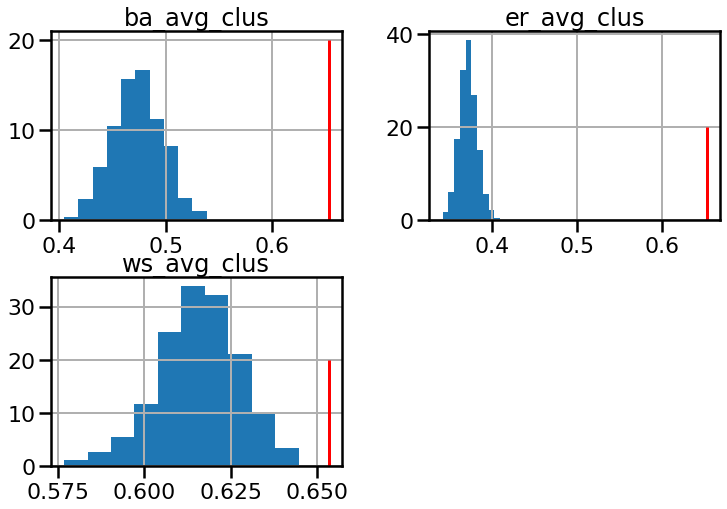

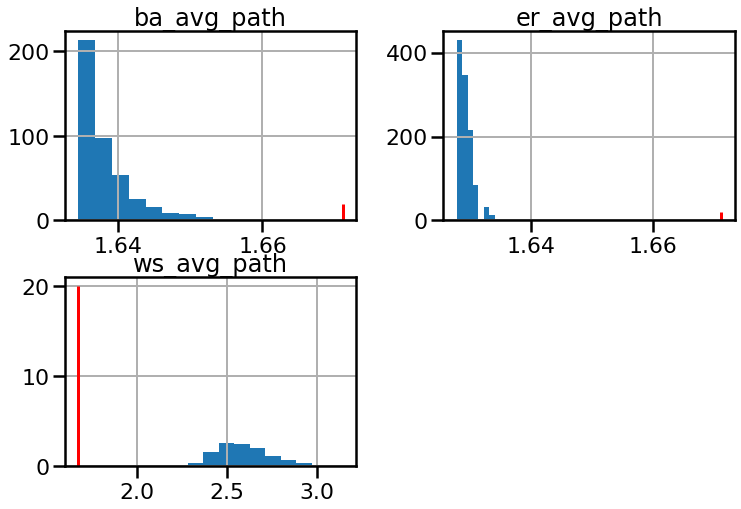

In [ ]:
repetitions = 1000
data = []
for i in range(repetitions):
    d = {}
    G = nx.barabasi_albert_graph(G_obs.number_of_nodes(),10,seed=i)
    d['ba_avg_clus'] = nx.average_clustering(G)
    d['ba_avg_path'] = nx.average_shortest_path_length(G)
    d['ba_avg_degree'] = G.number_of_edges()/G.number_of_nodes()
    d['ba_alpha'] = powerlaw.Fit([d for n, d in G.degree],discrete=True,xmin=8).alpha
    G = nx.gnm_random_graph(G_obs.number_of_nodes(),G_obs.number_of_edges())    
    d['er_avg_clus'] = nx.average_clustering(G)
    d['er_avg_path'] = nx.average_shortest_path_length(G)
    G = nx.newman_watts_strogatz_graph(G_obs.number_of_nodes(),round(G.number_of_edges()/G.number_of_nodes()),0.03)
    d['ws_avg_clus'] = nx.average_clustering(G)
    d['ws_avg_path'] = nx.average_shortest_path_length(G)
    data.append(d)

df = pd.DataFrame(data)
axs = df.filter(regex='avg_clus').hist(figsize=(12,8),density=True)
for ax in axs.flatten():
    ax.vlines(nx.average_clustering(G_obs),0,20,lw=3,color='r')

axs = df.filter(regex='avg_path').hist(figsize=(12,8),density=True)
for ax in axs.flatten():
    ax.vlines(nx.average_shortest_path_length(G_obs),0,20,lw=3,color='r')

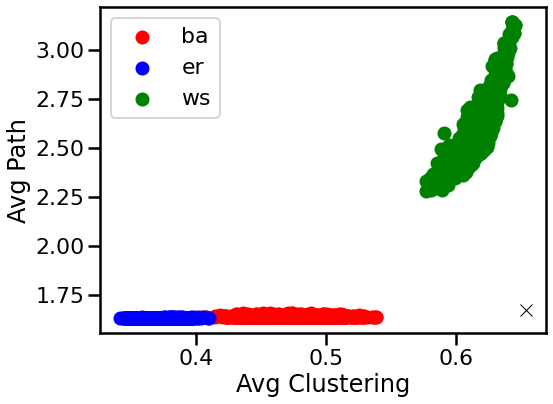

In [ ]:
for key,color in zip(['ba','er','ws'],['r','b','g']):
  plt.scatter(df[key+'_avg_clus'], df[key+'_avg_path'],color=color,label=key)
plt.plot(nx.average_clustering(G_obs), nx.average_shortest_path_length(G_obs),'xk',label='Red Observada')
plt.legend()
plt.ylabel('Avg Path')
plt.xlabel('Avg Clustering');

Podemos ver los valores de alpha de la distribución powerlaw ajustada al modelo de Baravasi Albert, para ver si dieron algo razonable

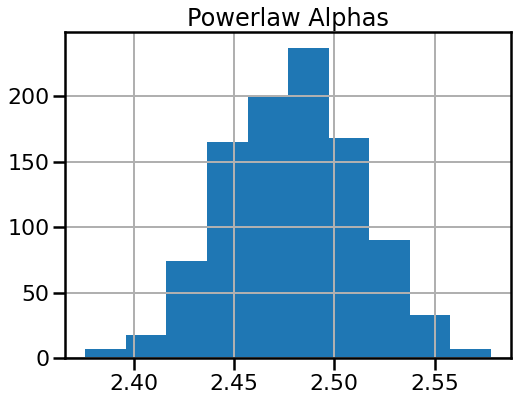

In [ ]:
plt.figure()
df['ba_alpha'].hist();
plt.title('Powerlaw Alphas');

## Cálculo de la asortividad

En ambos casos los valores de asortividad sugieren que no hay asociaciones preferenciales por un lado entre nodos de alto grado, y por el otro entre los de bajo grado.

In [ ]:
nx.degree_assortativity_coefficient(G_obs), nx.degree_assortativity_coefficient(G_per)

(-0.14696516028902537, -0.05034804979100025)

## Medias de centralidad
Es posible calcular las medias de centralidad:

- Grado

- Intermediación (betweenness)

- Cercanía (Closeness)

- Centralidad de autovectores (Eigenvector centrality)

En las salidas siguientes se muestran llamadas a las distintas funciones de centralidad, y se muestran los 10 
individuos con valores mayores para cada medida y red.


In [ ]:
pos = nx.spring_layout(G_obs,k=0.2)

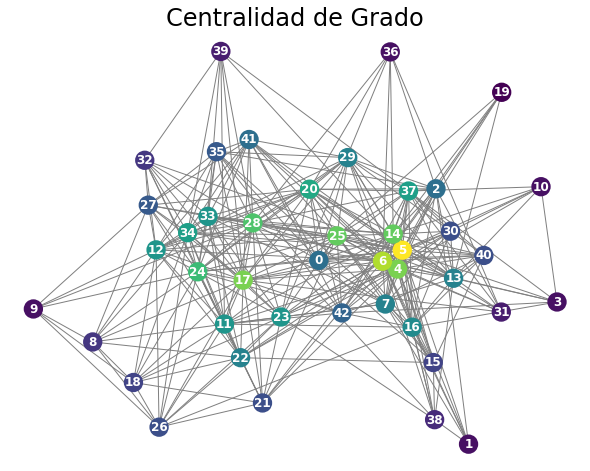

In [ ]:
centrality = nx.degree_centrality(G_obs)
values = [v for n,v in centrality.items()]
nx.draw(G_obs,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Grado');

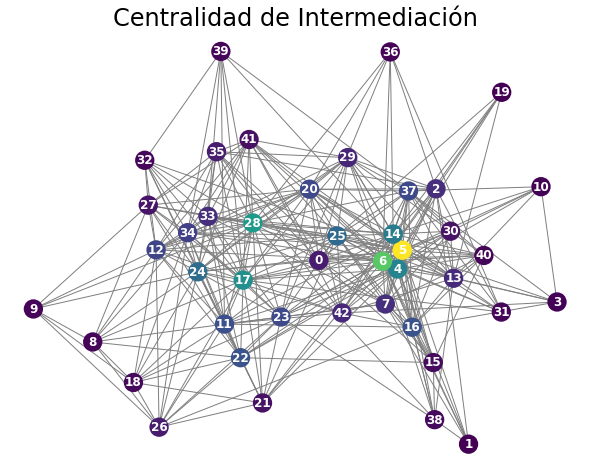

In [ ]:
centrality = nx.betweenness_centrality(G_obs)
values = [v for n,v in centrality.items()]
nx.draw(G_obs,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Intermediación');

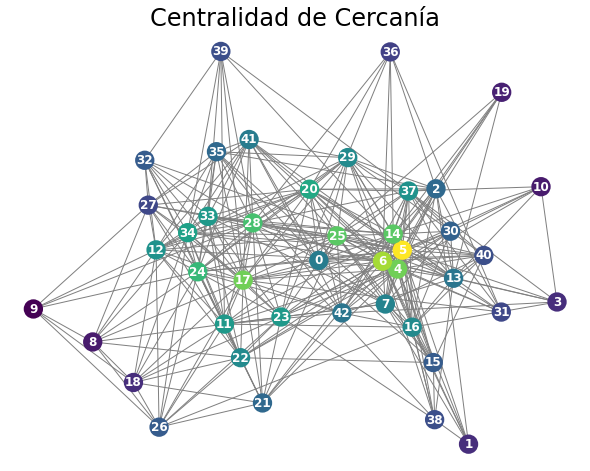

In [ ]:
centrality = nx.closeness_centrality(G_obs)
values = [v for n,v in centrality.items()]
nx.draw(G_obs,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Cercanía');

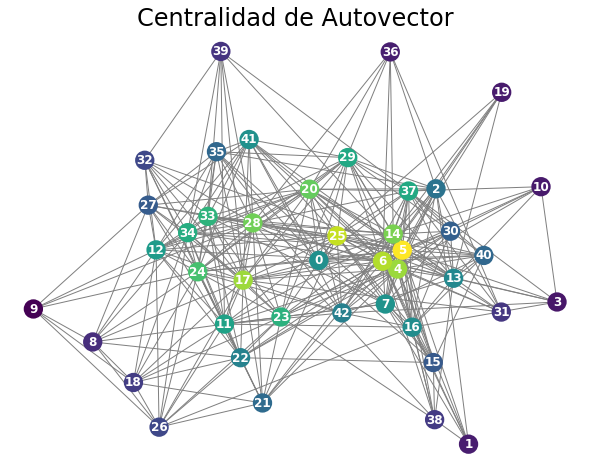

In [ ]:
centrality = nx.eigenvector_centrality(G_obs)
values = [v for n,v in centrality.items()]
nx.draw(G_obs,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Autovector');

## Comunidades

In [ ]:
def partition_set_to_dict(m):
    d = {}
    for i,c in enumerate(m):
        for n in c:
            d[n] = i
    return d

### Girvan newman

Crea grafos desconectados removiendo aristas elegidas según su valor de centralidad de aristas por cercanía (edge betweenness centrality)

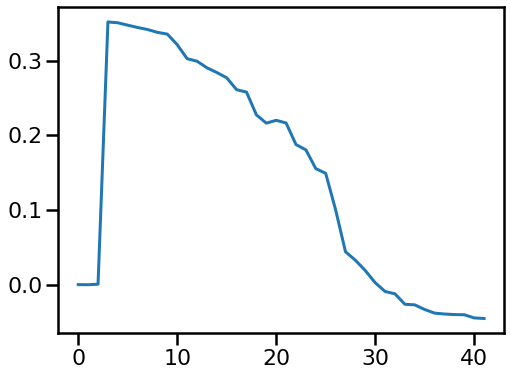

In [ ]:
modulos = nx.community.girvan_newman(G_obs)
modulos = list(modulos)
modularity = []
for m in modulos:
    modularity.append(community.modularity(partition_set_to_dict(m),G_obs))
plt.plot(modularity);
idx = np.argmax(modularity)
m = modulos[idx]

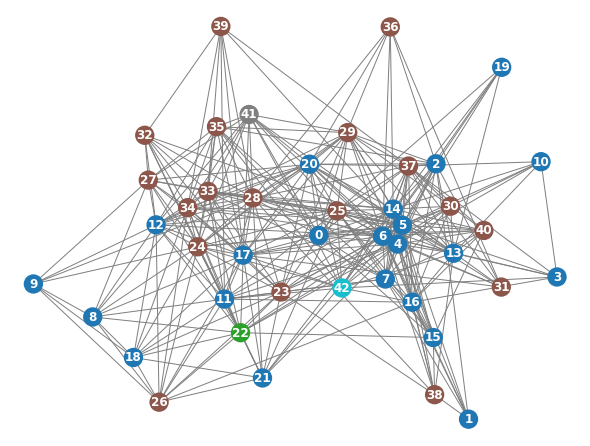

In [ ]:
plt.figure()
values = [v for n,v in partition_set_to_dict(m).items()]
nx.draw(G_obs,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values, font_color='white', edge_color='gray')

### Louvian

El módulo community usa el método de louvian. Para la red Observada

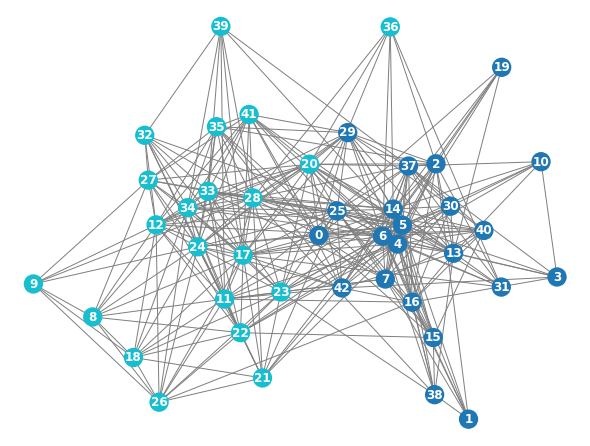

In [ ]:
modulos = community.best_partition(G_obs)
values_obs = [v for n,v in modulos.items()]
nx.draw(G_obs,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

Para la red percibida

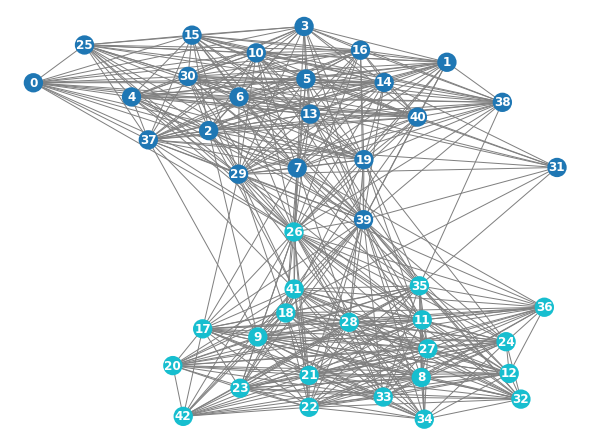

In [ ]:
modulos = community.best_partition(G_per)
values_per = [v for n,v in modulos.items()]
nx.draw(G_per, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_per, font_color='white', edge_color='gray')

Comparamos si las divisiones en comunidades para las dos redes es parecida

In [ ]:
adjusted_rand_score(values_obs,values_per)

0.8182848897134611